# IBM Data Science Professional Capstone Project
### Using Foursquare Data to Determine Best Neighborhood in Chicago to Open New Pizza Place
##### Univariate and Bivariate Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
import folium

### Basic Descriptive Statistics / Review

In [2]:
df = pd.read_pickle('./df_for_model.pkl')
df.head()

,Neighborhood,Pizza Place,Latitude,Longitude,WHITE,HISP,BLACK,CARPOOL,INC_100_150K,MEDINC,...,Fried Chicken Joint,Gas Station,Gym,Gym / Fitness Center,High School,Hotel,Italian Restaurant,Mexican Restaurant,Park,Southern / Soul Food Restaurant
0,ALBANY PARK,0.051576,41.96829,-87.72338,15608,24927,2401,2222,2326,58128.20513,...,0.008596,0.000000,0.011461,0.005731,0.005731,0.000000,0.000000,0.017192,0.028653,0.000000
1,ARCHER HEIGHTS,0.032864,41.81154,-87.72556,2213,10181,115,741,520,46632.12435,...,0.004695,0.004695,0.009390,0.009390,0.004695,0.004695,0.004695,0.061033,0.028169,0.000000
2,ARMOUR SQUARE,0.029024,41.83458,-87.63189,1728,538,1218,934,549,26466.21622,...,0.005277,0.000000,0.007916,0.023747,0.034301,0.005277,0.007916,0.010554,0.052770,0.005277
3,ASHBURN,0.054878,41.74785,-87.70995,4745,16924,20837,2296,2393,66560.12658,...,0.024390,0.000000,0.012195,0.006098,0.018293,0.000000,0.006098,0.018293,0.067073,0.000000
4,AUBURN GRESHAM,0.009217,41.74319,-87.65504,324,862,44435,1136,1151,31694.19134,...,0.013825,0.004608,0.000000,0.000000,0.036866,0.000000,0.000000,0.009217,0.050691,0.013825


In [4]:
df.describe()

,Pizza Place,Latitude,Longitude,WHITE,HISP,BLACK,CARPOOL,INC_100_150K,MEDINC,OWN_OCC_HU,...,Fried Chicken Joint,Gas Station,Gym,Gym / Fitness Center,High School,Hotel,Italian Restaurant,Mexican Restaurant,Park,Southern / Soul Food Restaurant
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,...,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,0.032987,41.840506,-87.675026,11560.402597,10255.805195,10643.961039,1323.415584,1721.506494,51038.798585,6058.779221,...,0.008656,0.002785,0.012412,0.013567,0.013296,0.007990,0.005078,0.022164,0.046562,0.001736
std,0.014849,0.099831,0.070053,15792.378454,13391.355919,13655.226111,1098.820484,1861.478993,23754.336861,4322.116500,...,0.009835,0.004594,0.013989,0.013749,0.011471,0.019068,0.005815,0.026416,0.024842,0.003134
min,0.000000,41.653680,-87.904460,10.000000,33.000000,115.000000,29.000000,63.000000,13344.709900,239.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.024510,41.762060,-87.719470,791.000000,719.000000,848.000000,477.000000,582.000000,32843.042850,2913.000000,...,0.002457,0.000000,0.000000,0.003704,0.004184,0.000000,0.000000,0.006250,0.028653,0.000000
50%,0.033058,41.834580,-87.669360,4403.000000,4591.000000,5630.000000,988.000000,1116.000000,45670.731710,5606.000000,...,0.004695,0.000000,0.009479,0.009346,0.011662,0.000000,0.003704,0.012285,0.044118,0.000000
75%,0.044444,41.928480,-87.622390,16263.000000,15840.000000,16206.000000,1887.000000,2371.000000,62381.756760,7613.000000,...,0.011321,0.004255,0.016835,0.019231,0.018349,0.006410,0.009346,0.023810,0.064103,0.002874
max,0.067010,42.008850,-87.530680,79382.000000,64782.000000,76989.000000,5284.000000,10038.000000,110365.479100,22713.000000,...,0.048000,0.023622,0.059542,0.059542,0.048309,0.090654,0.023333,0.105769,0.115385,0.013825


In [5]:
df.dtypes

Neighborhood                        object
Pizza Place                        float64
Latitude                           float64
Longitude                          float64
WHITE                                int64
HISP                                 int64
BLACK                                int64
CARPOOL                              int64
INC_100_150K                         int64
MEDINC                             float64
OWN_OCC_HU                           int64
HV_150_300K                          int64
AVG_VMT                            float64
VACperc                            float64
HCOV75K_LT20PCT                      int64
in_lbr_frc_pct                     float64
ATM                                float64
Bakery                             float64
Bar                                float64
Cosmetics Shop                     float64
Elementary School                  float64
Fast Food Restaurant               float64
Fried Chicken Joint                float64
Gas Station

### Univariate Review

##### Top 20 Pizza Place neighborhoods' population by race:

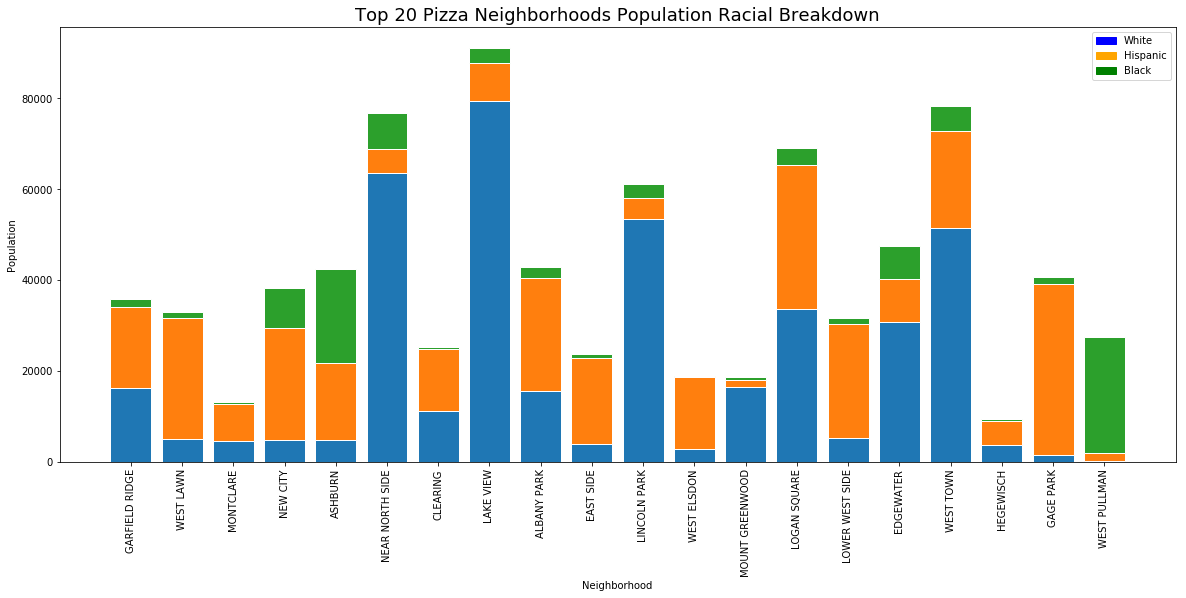

In [56]:
df_sorted = df.sort_values(by='Pizza Place',ascending=False).head(20)

# Values of each group
w = df_sorted['WHITE']
h = df_sorted['HISP']
b = df_sorted['BLACK']

# Heights of bars 1 + bars 2
bars = np.add(w, h).tolist()

# The position of the bars on the x-axis
r = np.arange(20)
 
# Names of group and bar width
names = df_sorted['Neighborhood']
barWidth = 0.8

#create canvas
plt.figure(figsize=(20,8))

# Create different bars
plt.bar(r, w, edgecolor='white', width=barWidth)
plt.bar(r, h, bottom=w, edgecolor='white', width=barWidth)
plt.bar(r, b, bottom=bars, edgecolor='white', width=barWidth)
 
# Customize axes/title/legend
plt.xticks(r, names, rotation='vertical')
plt.xlabel("Neighborhood")
plt.ylabel('Population')
plt.title('Top 20 Pizza Neighborhoods Population Racial Breakdown',size=18)
blue_patch = mpatches.Patch(color='blue', label='White')
orange_patch = mpatches.Patch(color='orange', label = 'Hispanic')
green_patch = mpatches.Patch(color = 'green', label = 'Black')
plt.legend(handles=[blue_patch,orange_patch,green_patch])
 
# Show graphic
plt.show()

##### Additional Univariate Review

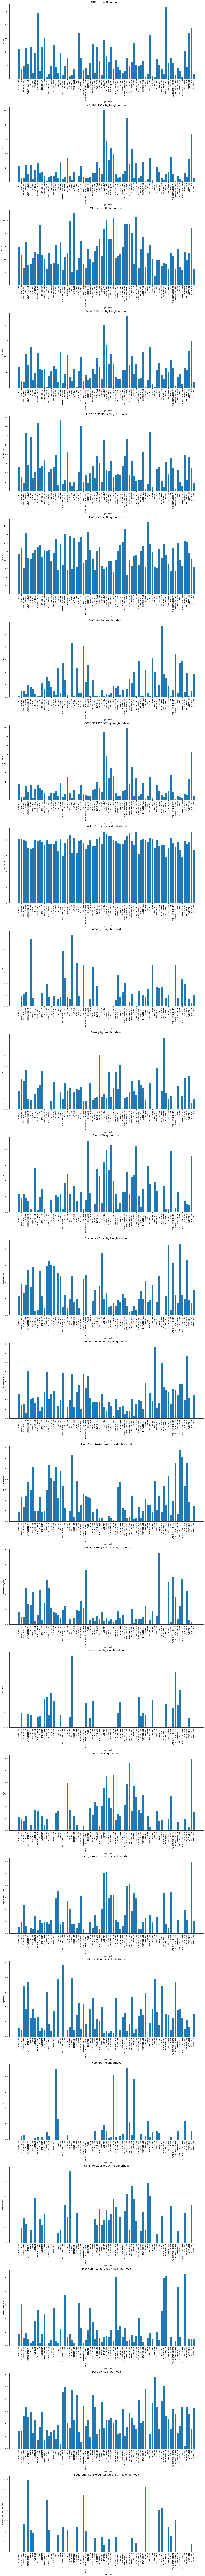

In [47]:
df_ranked = df.sort_values(by='Pizza Place',ascending=False)

cols = df_ranked.columns.tolist()
cols = cols[7:]
n = len(cols)

plt.figure(figsize=(20,250))

for index, col in enumerate(cols):
    plt.subplot(n,1,index+1)
    plt.bar(df_ranked['Neighborhood'],df_ranked[col])
    plt.xticks(rotation='vertical')
    plt.ylabel(col)
    plt.xlabel('Neighborhood')
    plt.title(col + ' by Neighborhood',size=18)
    plt.tight_layout()

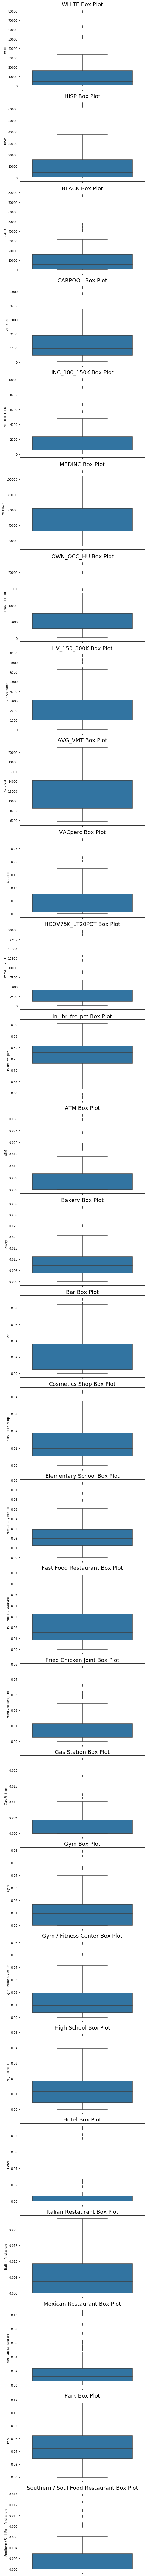

In [66]:
cols = df.columns.tolist()
cols = cols[4:]
n = len(cols)

plt.figure(figsize=(7,120))

for index, col in enumerate(cols):
    plt.subplot(n,1,index+1)
    sns.boxplot(y=df[col], data=df)
    plt.ylabel(col)
    plt.title(col + ' Box Plot',size=18)
    plt.tight_layout()

##### Bivariate Review

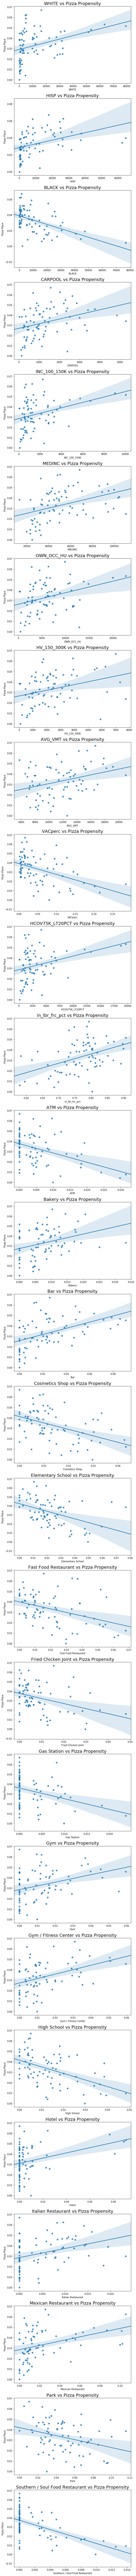

In [55]:
df_ranked = df.sort_values(by='Pizza Place',ascending=False)

cols = df_ranked.columns.tolist()
cols = cols[4:]
n = len(cols)

plt.figure(figsize=(8,150))
c = 1

for index, col in enumerate(cols):
    plt.subplot(n,c,index+1)
    sns.regplot(df_ranked[col],df_ranked['Pizza Place'],data=df_ranked)
    plt.ylabel('Pizza Place')
    plt.xlabel(col)
    plt.title(col + ' vs Pizza Propensity',size=18)
    plt.tight_layout()